Quandl offers a simple API for stock market data downloads. Here I will be using Google Stock Prices and train a classifier to predict them. 
<br>
<br>
**Dataset** Stock Prices for Google Stock | WKN A0B7FY | ISIN US38259P5089 from the Boerse Stuttgart. Currency:EUR; Sector: IT-Technology - E-Commerce
<br>
<br>
**In this notebook, Closing stock price has been taken as the target to be predicted**

In [498]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [589]:
import quandl
df1 = quandl.get('WIKI/GOOGL')

In [501]:
print(df1.shape)
df1.head()

(3424, 12)


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


Columns:

Open, High, Low, Close, Volume are unadjusted.

Dividend shows the unadjusted dividend on any ex-dividend date else 0.0.

Split shows any split that occurred on a the given DATE else 1.0

Adjusted values are adjusted for dividends and splits using the CRSP methodology.


In [502]:
#Summary stats for Apple Stock
df1.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000,3424.0,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,596.602610,602.045438,590.571710,596.352862,7.818568e+06,0.165880,1.0,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,226.989782,227.783310,225.846581,226.896692,8.248211e+06,9.706436,0.0,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,461.157500,465.392500,456.065000,461.205000,2.430647e+06,0.000000,1.0,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,565.120000,569.599950,559.860000,564.940000,5.076200e+06,0.000000,1.0,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,735.627500,740.850000,728.680025,733.262500,1.020910e+07,0.000000,1.0,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


In [503]:
#general info
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 12 columns):
Open           3424 non-null float64
High           3424 non-null float64
Low            3424 non-null float64
Close          3424 non-null float64
Volume         3424 non-null float64
Ex-Dividend    3424 non-null float64
Split Ratio    3424 non-null float64
Adj. Open      3424 non-null float64
Adj. High      3424 non-null float64
Adj. Low       3424 non-null float64
Adj. Close     3424 non-null float64
Adj. Volume    3424 non-null float64
dtypes: float64(12)
memory usage: 347.8 KB


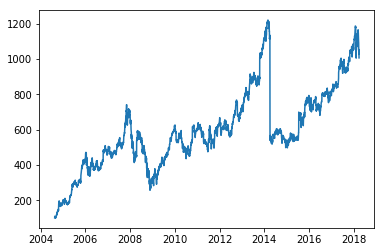

In [598]:
# let us observe the trend in closing stock prices 
import matplotlib.pyplot as plt
plt.plot(df1['Close'])
plt.show()

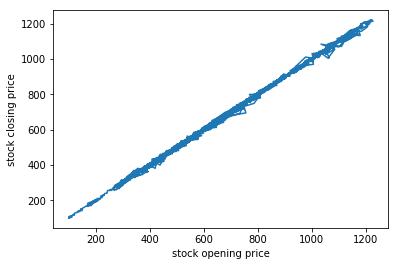

In [599]:
# let us check the relationship between the opening day price and closing price for the day
X = df1['Open']
Y = df1['Close']
plt.plot(X,Y)
plt.xlabel("stock opening price")
plt.ylabel("stock closing price")
plt.show()

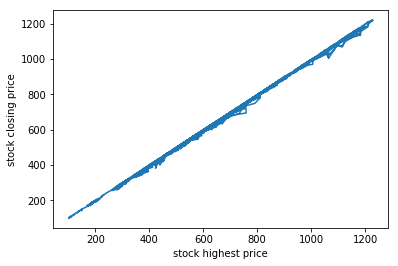

In [606]:
# relationship between the highest day price and closing price for the day
X = df1['High']
Y = df1['Close']
plt.plot(X,Y)
plt.xlabel("stock highest price")
plt.ylabel("stock closing price")
plt.show()

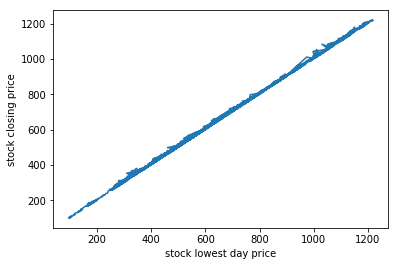

In [601]:
# relationship between the lowest day price and closing price for the day
X = df1['Low']
Y = df1['Close']
plt.plot(X,Y)
plt.xlabel("stock lowest day price")
plt.ylabel("stock closing price")
plt.show()

In [608]:
print(df1[(df1['Ex-Dividend'] != 0.0)])

              Open   High     Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2014-04-03  573.39  588.3  566.01  571.5  4018300.0   567.971668          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
2014-04-03     573.39      588.3    566.01       571.5    4018300.0  


> for Ex-Dividend, there are 2 entries >=1
<br>
> the split ratio column provides no useful information as there was no split during this time period. 
<br>

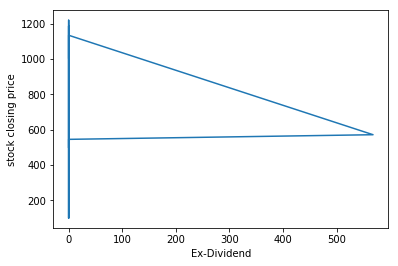

In [603]:
# relationship between the Ex-dividend and closing price for the day
X = df1['Ex-Dividend']
Y = df1['Close']
plt.plot(X,Y)
plt.xlabel("Ex-Dividend")
plt.ylabel("stock closing price")
plt.show()

### As we can observe, the closing day price is directly proportional to the opening, highest and lowest prices. We will now train classifiers and check accuracy using the 1st 4 features. We will later evaluate which features are best suited for this purpose 

In [505]:
df = df1[['Open', 'High', 'Low', 'Close', 'Volume']]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0


In [506]:
target = df['Close']

In [507]:
del df['Close']
df.head()

,Open,High,Low,Volume
Date,,,,
2004-08-19,100.01,104.06,95.96,44659000.0
2004-08-20,101.01,109.08,100.50,22834300.0
2004-08-23,110.76,113.48,109.05,18256100.0
2004-08-24,111.24,111.60,103.57,15247300.0
2004-08-25,104.76,108.00,103.88,9188600.0


In [508]:
data = np.array(df)

In [590]:
# i dont wish to shuffle the data(this doesnt support shuffle=False in train_test_split)
# classifier learns on first 2800 days and predicts on remaining 624 days 
X_train = data[:2800, :]
Y_train = target[:2800]
X_test = data[2800:, :]
Y_test = target[2800:]
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_ = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

In [510]:
clf = LinearRegression()
clf.fit(X_train_, Y_train)
Y_pred=clf.predict(X_test_)

In [511]:
print(clf.score(X_test_, Y_test))

0.998943815364838


In [512]:
for i in range(10):
    print("%.2f"%(Y_pred[i]))

650.28
666.13
671.94
663.59
659.86
668.76
674.63
684.51
685.03
691.66


In [513]:
Y_test[:10]

Date
2015-10-02    656.99
2015-10-05    671.68
2015-10-06    671.64
2015-10-07    670.00
2015-10-08    667.00
2015-10-09    671.24
2015-10-12    676.43
2015-10-13    683.17
2015-10-14    680.41
2015-10-15    693.02
Name: Close, dtype: float64

In [609]:
# as can be observed, the values in Y_test and Y_pred are close enough

In [514]:
clf2 = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred_dt = clf.predict(X_test)
clf.score(X_test, Y_test)

0.9989438153647907

### Trying to estimate the order of importance of various features present in the original dataset using random forest  

In [515]:
from sklearn.ensemble import RandomForestRegressor

In [516]:
del df1['Close']

In [560]:
data_train = np.array(df1)
X_train_rgr = data_train[:2800]
X_test_rgr = data_train[2800:]
rgr = RandomForestRegressor(n_estimators=15, max_features=9, n_jobs=2)
rgr.fit(X_train_rgr, Y_train)
Y_pred_rgr = rgr.predict(X_test_rgr)
print(rgr.score(X_test_rgr, Y_test))


0.7589436113676911


In [518]:
imp = rgr.feature_importances_
for i in range(len(imp)):
    print("%.2f"%(imp[i]))

0.02
0.33
0.34
0.00
0.00
0.00
0.00
0.01
0.02
0.27
0.00


> important features observed by running the regressor multiple times include- 'Open', 'High', 'Low', 'Adj high', Adj Low'. 
<br>
> The score comes different(varies largely) each time I run the regressor. 
<br>
> Now i shall rerun it on the selected festures
<br>
> **Note that**- Random forest’s ranking is typically aggressive in the sense that there is a sharp drop-off of scores after the first few top ones

### I NOW USE RECURSIVE FEATURE ELIMINATION TO GET THE MOST IMPORTANT FEATURES

In [520]:
from sklearn.feature_selection import RFE

In [521]:
scaler = preprocessing.StandardScaler().fit(data_train)
data = scaler.transform(data_train)
clf_3 = LinearRegression()
selector = RFE(clf_3, step=1)
# step=numnber of features to remove each time 
selector = selector.fit(data, target)
selector.ranking_

array([6, 1, 1, 3, 7, 5, 2, 1, 1, 1, 4])

In [522]:
clf_4 = RandomForestRegressor()
selector = RFE(clf_4, step=1)
selector = selector.fit(data, target)
selector.ranking_

array([2, 1, 1, 4, 6, 7, 3, 1, 1, 1, 5])

NOTE - RFE USES 'feature_importances_' IN CASE OF RANDOM FOREST, 'coef_' IN CASE OF LINEAR REGRESSION 
<br>
**the final selected features are those ranked 1 or 2 - 'Open', 'High', 'Low', 'Adj High', Adj Low', 'Adj Close'** 

In [523]:
df_final = df1[['Open', 'High', 'Low', 'Adj. High', 'Adj. Low', 'Adj. Close']]

In [524]:
final_data = np.array(df_final)
df_final.head()

,Open,High,Low,Adj. High,Adj. Low,Adj. Close
Date,,,,,,
2004-08-19,100.01,104.06,95.96,52.191109,48.128568,50.322842
2004-08-20,101.01,109.08,100.50,54.708881,50.405597,54.322689
2004-08-23,110.76,113.48,109.05,56.915693,54.693835,54.869377
2004-08-24,111.24,111.60,103.57,55.972783,51.945350,52.597363
2004-08-25,104.76,108.00,103.88,54.167209,52.100830,53.164113


In [531]:
X_train_f = final_data[:2800]
X_test_f = final_data[2800:]
Y_train = target[:2800]
Y_test = target[2800:]
print(X_train_f.shape)
print(Y_train.shape)
print(X_test_f.shape)
print(Y_test.shape)

(2800, 6)
(2800,)
(624, 6)
(624,)


In [532]:
clf_final = LinearRegression()
clf_final.fit(X_train_f, Y_train)
Y_pred_final = clf_final.predict(X_test_f)
clf_final.score(X_test_f, Y_test)

0.9993664900004579

### observe a change from 0.998943 to 0.99936 in accuracy 

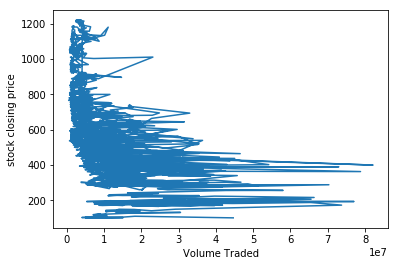

In [614]:
# cross-checking, 
# relationship between the volume and closing price for the day
X = df1['Volume']
Y = df1['Close']
plt.plot(X,Y)
plt.xlabel("Volume Traded")
plt.ylabel("stock closing price")
plt.show()

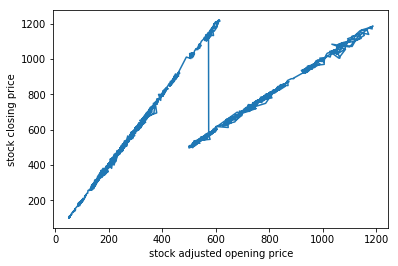

In [615]:
# relationship between the adjusted opening day price and closing price for the day
X = df1['Adj. Open']
plt.plot(X,Y)
plt.xlabel("stock adjusted opening price")
plt.ylabel("stock closing price")
plt.show()

In [617]:
# we assume that if the volume is not related linearly to the closing day prices, the adjusted volume would follow the fashion